# Measure photometry of the clumps A and B with elliptical apertures

In this analysis, we measure photometry of the clumps A and B with elliptical apertures matching the shapes of the two clumps. 

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

%matplotlib inline

## Setup inputs

In [2]:
# Set of filters
filters = ['hst_acs_f435w', 'hst_acs_f475w', 'hst_acs_f555w', 'hst_acs_f606w', 'hst_acs_f625w', 'hst_acs_f775w', 
           'hst_acs_f814w', 'hst_acs_f850lp', 'jwst_nircam_f115w', 'jwst_nircam_f150w', 'jwst_nircam_f200w', 
           'jwst_nircam_f277w', 'jwst_nircam_f356w', 'jwst_nircam_f444w', 'jwst_nircam_f480m']
nbands = len(filters)

# directory of the images
dir_images = '../../images/'

# input science images
sci_img = {}
sci_img['hst_acs_f435w'] = 'macs0647-grizli-v6.0-f435w_drc_sci.fits.gz'
sci_img['hst_acs_f475w'] = 'macs0647-grizli-v6.0-f475w_drc_sci.fits.gz'
sci_img['hst_acs_f555w'] = 'macs0647-grizli-v6.0-f555w_drc_sci.fits.gz'
sci_img['hst_acs_f606w'] = 'macs0647-grizli-v6.0-f606w_drc_sci.fits.gz'
sci_img['hst_acs_f625w'] = 'macs0647-grizli-v6.0-f625w_drc_sci.fits.gz'
sci_img['hst_acs_f775w'] = 'macs0647-grizli-v6.0-f775w_drc_sci.fits.gz'
sci_img['hst_acs_f814w'] = 'macs0647-grizli-v6.0-f814w_drc_sci.fits.gz'
sci_img['hst_acs_f850lp'] = 'macs0647-grizli-v6.0-f850lp_drc_sci.fits.gz'
sci_img['jwst_nircam_f115w'] = 'macs0647-grizli-v6.0-f115w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f150w'] = 'macs0647-grizli-v6.0-f150w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f200w'] = 'macs0647-grizli-v6.0-f200w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f277w'] = 'macs0647-grizli-v6.0-f277w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f356w'] = 'macs0647-grizli-v6.0-f356w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f444w'] = 'macs0647-grizli-v6.0-f444w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f480m'] = 'macs0647-grizli-v6.0-f480m-clear_drc_sci.fits.gz'

# input weight images
wht_img = {}
wht_img['hst_acs_f435w'] = 'macs0647-grizli-v6.0-f435w_drc_wht.fits.gz'
wht_img['hst_acs_f475w'] = 'macs0647-grizli-v6.0-f475w_drc_wht.fits.gz'
wht_img['hst_acs_f555w'] = 'macs0647-grizli-v6.0-f555w_drc_wht.fits.gz'
wht_img['hst_acs_f606w'] = 'macs0647-grizli-v6.0-f606w_drc_wht.fits.gz'
wht_img['hst_acs_f625w'] = 'macs0647-grizli-v6.0-f625w_drc_wht.fits.gz'
wht_img['hst_acs_f775w'] = 'macs0647-grizli-v6.0-f775w_drc_wht.fits.gz'
wht_img['hst_acs_f814w'] = 'macs0647-grizli-v6.0-f814w_drc_wht.fits.gz'
wht_img['hst_acs_f850lp'] = 'macs0647-grizli-v6.0-f850lp_drc_wht.fits.gz'
wht_img['jwst_nircam_f115w'] = 'macs0647-grizli-v6.0-f115w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f150w'] = 'macs0647-grizli-v6.0-f150w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f200w'] = 'macs0647-grizli-v6.0-f200w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f277w'] = 'macs0647-grizli-v6.0-f277w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f356w'] = 'macs0647-grizli-v6.0-f356w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f444w'] = 'macs0647-grizli-v6.0-f444w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f480m'] = 'macs0647-grizli-v6.0-f480m-clear_drc_wht.fits.gz'

# input variance images
var_img = {}
for bb in range(nbands):
    var_img[filters[bb]] = 'var_'+wht_img[filters[bb]]
    
# Convolution kernels to be used for PSF matching
dir_kernel = '../../PSFs_kernels/'
kernels = {}
kernels['hst_acs_f435w'] = dir_kernel+'kernel_HST_F435W_to_JWST_F480M.fits'
kernels['hst_acs_f475w'] = dir_kernel+'kernel_HST_F475W_to_JWST_F480M.fits'
kernels['hst_acs_f555w'] = dir_kernel+'kernel_HST_F555W_to_JWST_F480M.fits'
kernels['hst_acs_f606w'] = dir_kernel+'kernel_HST_F606W_to_JWST_F480M.fits'
kernels['hst_acs_f625w'] = dir_kernel+'kernel_HST_F625W_to_JWST_F480M.fits'
kernels['hst_acs_f775w'] = dir_kernel+'kernel_HST_F775W_to_JWST_F480M.fits'
kernels['hst_acs_f814w'] = dir_kernel+'kernel_HST_F814W_to_JWST_F480M.fits'
kernels['hst_acs_f850lp'] = dir_kernel+'kernel_HST_F850LP_to_JWST_F480M.fits'
kernels['jwst_nircam_f115w'] = dir_kernel+'kernel_JWST_F115W_to_JWST_F480M.fits'
kernels['jwst_nircam_f150w'] = dir_kernel+'kernel_JWST_F150W_to_JWST_F480M.fits'
kernels['jwst_nircam_f200w'] = dir_kernel+'kernel_JWST_F200W_to_JWST_F480M.fits'
kernels['jwst_nircam_f277w'] = dir_kernel+'kernel_JWST_F277W_to_JWST_F480M.fits'
kernels['jwst_nircam_f356w'] = dir_kernel+'kernel_JWST_F356W_to_JWST_F480M.fits'
kernels['jwst_nircam_f444w'] = dir_kernel+'kernel_JWST_F444W_to_JWST_F480M.fits'
kernels['jwst_nircam_f480m'] = None

# The unit, scale, and pixel size
# Pixel size can be obtained using calc_pixsize function
from piXedfit.piXedfit_images import calc_pixsize

img_unit = {}
img_scale = {}
img_pixsizes = {}
for bb in range(0,nbands):
    img_unit[filters[bb]] = 'erg/s/cm2/A'
    
    hdu = fits.open(dir_images+sci_img[filters[bb]])
    img_scale[filters[bb]] = float(hdu[0].header['PHOTFLAM'])
    hdu.close()
    
    img_pixsizes[filters[bb]] = calc_pixsize(dir_images+sci_img[filters[bb]])

# The coordinate and redshift of MACS0647-JD2. 
# In general, redshift information is optional here. 
# We use photometric redshift estimate from EAZY code.
oriID = 3349
gal_ra = 101.971326
gal_dec = 70.239716
gal_z = 10.17

# Size of the stamp images to be produced from the image processing
stamp_size = [111,111]

## Initialize image processing 

Initializing `images_processing` class without running the actual image processing because it has been performed before (see `image_processing_stamp_images_JD1.ipynb`). 

In [3]:
from piXedfit.piXedfit_images import images_processing

# We don't do PSF matching in this anlysis, so we set flag_psfmatch=1
# We will also apply oversampling by reprojecting the images to match the spatial sampling of F150W (0.02"/pixel) and without PSF matching

# Because we have performed image processing in image_processing_stamp_images_JD1.ipynb, so we can set run_image_processing=False
flag_psfmatch = 1
flag_reproject = 0
idfil_align = 9
img_process = images_processing(filters, sci_img, var_img, gal_ra, gal_dec, dir_images=dir_images, img_unit=img_unit, img_scale=img_scale, 
                                run_image_processing=False, flag_psfmatch=flag_psfmatch, flag_reproject=flag_reproject, img_pixsizes=img_pixsizes, 
                                gal_z=gal_z, stamp_size=stamp_size, idfil_align=9)

## Provide the names of the stamp images produced from the image processing

In [4]:
output_stamps = {'name_img_hst_acs_f435w': 'stamp_crop_macs0647-grizli-v6.0-f435w_drc_sci.fits.gz', 
                 'name_var_hst_acs_f435w': 'stamp_crop_var_macs0647-grizli-v6.0-f435w_drc_wht.fits.gz', 
                 'idfil_align': 9, 'idfil_psfmatch': 0, 'name_img_hst_acs_f475w': 'stamp_crop_macs0647-grizli-v6.0-f475w_drc_sci.fits.gz', 
                 'name_var_hst_acs_f475w': 'stamp_crop_var_macs0647-grizli-v6.0-f475w_drc_wht.fits.gz', 
                 'name_img_hst_acs_f555w': 'stamp_crop_macs0647-grizli-v6.0-f555w_drc_sci.fits.gz', 
                 'name_var_hst_acs_f555w': 'stamp_crop_var_macs0647-grizli-v6.0-f555w_drc_wht.fits.gz', 
                 'name_img_hst_acs_f606w': 'stamp_crop_macs0647-grizli-v6.0-f606w_drc_sci.fits.gz', 
                 'name_var_hst_acs_f606w': 'stamp_crop_var_macs0647-grizli-v6.0-f606w_drc_wht.fits.gz', 
                 'name_img_hst_acs_f625w': 'stamp_crop_macs0647-grizli-v6.0-f625w_drc_sci.fits.gz', 
                 'name_var_hst_acs_f625w': 'stamp_crop_var_macs0647-grizli-v6.0-f625w_drc_wht.fits.gz',
                 'name_img_hst_acs_f775w': 'stamp_crop_macs0647-grizli-v6.0-f775w_drc_sci.fits.gz', 
                 'name_var_hst_acs_f775w': 'stamp_crop_var_macs0647-grizli-v6.0-f775w_drc_wht.fits.gz', 
                 'name_img_hst_acs_f814w': 'stamp_crop_macs0647-grizli-v6.0-f814w_drc_sci.fits.gz', 
                 'name_var_hst_acs_f814w': 'stamp_crop_var_macs0647-grizli-v6.0-f814w_drc_wht.fits.gz', 
                 'name_img_hst_acs_f850lp': 'stamp_crop_macs0647-grizli-v6.0-f850lp_drc_sci.fits.gz', 
                 'name_var_hst_acs_f850lp': 'stamp_crop_var_macs0647-grizli-v6.0-f850lp_drc_wht.fits.gz', 
                 'name_img_jwst_nircam_f115w': 'stamp_crop_macs0647-grizli-v6.0-f115w-clear_drc_sci.fits.gz',
                 'name_var_jwst_nircam_f115w': 'stamp_crop_var_macs0647-grizli-v6.0-f115w-clear_drc_wht.fits.gz', 
                 'name_img_jwst_nircam_f150w': 'stamp_crop_macs0647-grizli-v6.0-f150w-clear_drc_sci.fits.gz', 
                 'name_var_jwst_nircam_f150w': 'stamp_crop_var_macs0647-grizli-v6.0-f150w-clear_drc_wht.fits.gz', 
                 'name_img_jwst_nircam_f200w': 'stamp_crop_macs0647-grizli-v6.0-f200w-clear_drc_sci.fits.gz', 
                 'name_var_jwst_nircam_f200w': 'stamp_crop_var_macs0647-grizli-v6.0-f200w-clear_drc_wht.fits.gz', 
                 'name_img_jwst_nircam_f277w': 'stamp_crop_macs0647-grizli-v6.0-f277w-clear_drc_sci.fits.gz', 
                 'name_var_jwst_nircam_f277w': 'stamp_crop_var_macs0647-grizli-v6.0-f277w-clear_drc_wht.fits.gz', 
                 'name_img_jwst_nircam_f356w': 'stamp_crop_macs0647-grizli-v6.0-f356w-clear_drc_sci.fits.gz', 
                 'name_var_jwst_nircam_f356w': 'stamp_crop_var_macs0647-grizli-v6.0-f356w-clear_drc_wht.fits.gz', 
                 'name_img_jwst_nircam_f444w': 'stamp_crop_macs0647-grizli-v6.0-f444w-clear_drc_sci.fits.gz', 
                 'name_var_jwst_nircam_f444w': 'stamp_crop_var_macs0647-grizli-v6.0-f444w-clear_drc_wht.fits.gz', 
                 'name_img_jwst_nircam_f480m': 'stamp_crop_macs0647-grizli-v6.0-f480m-clear_drc_sci.fits.gz', 
                 'name_var_jwst_nircam_f480m': 'stamp_crop_var_macs0647-grizli-v6.0-f480m-clear_drc_wht.fits.gz'}

## Plot stamp images

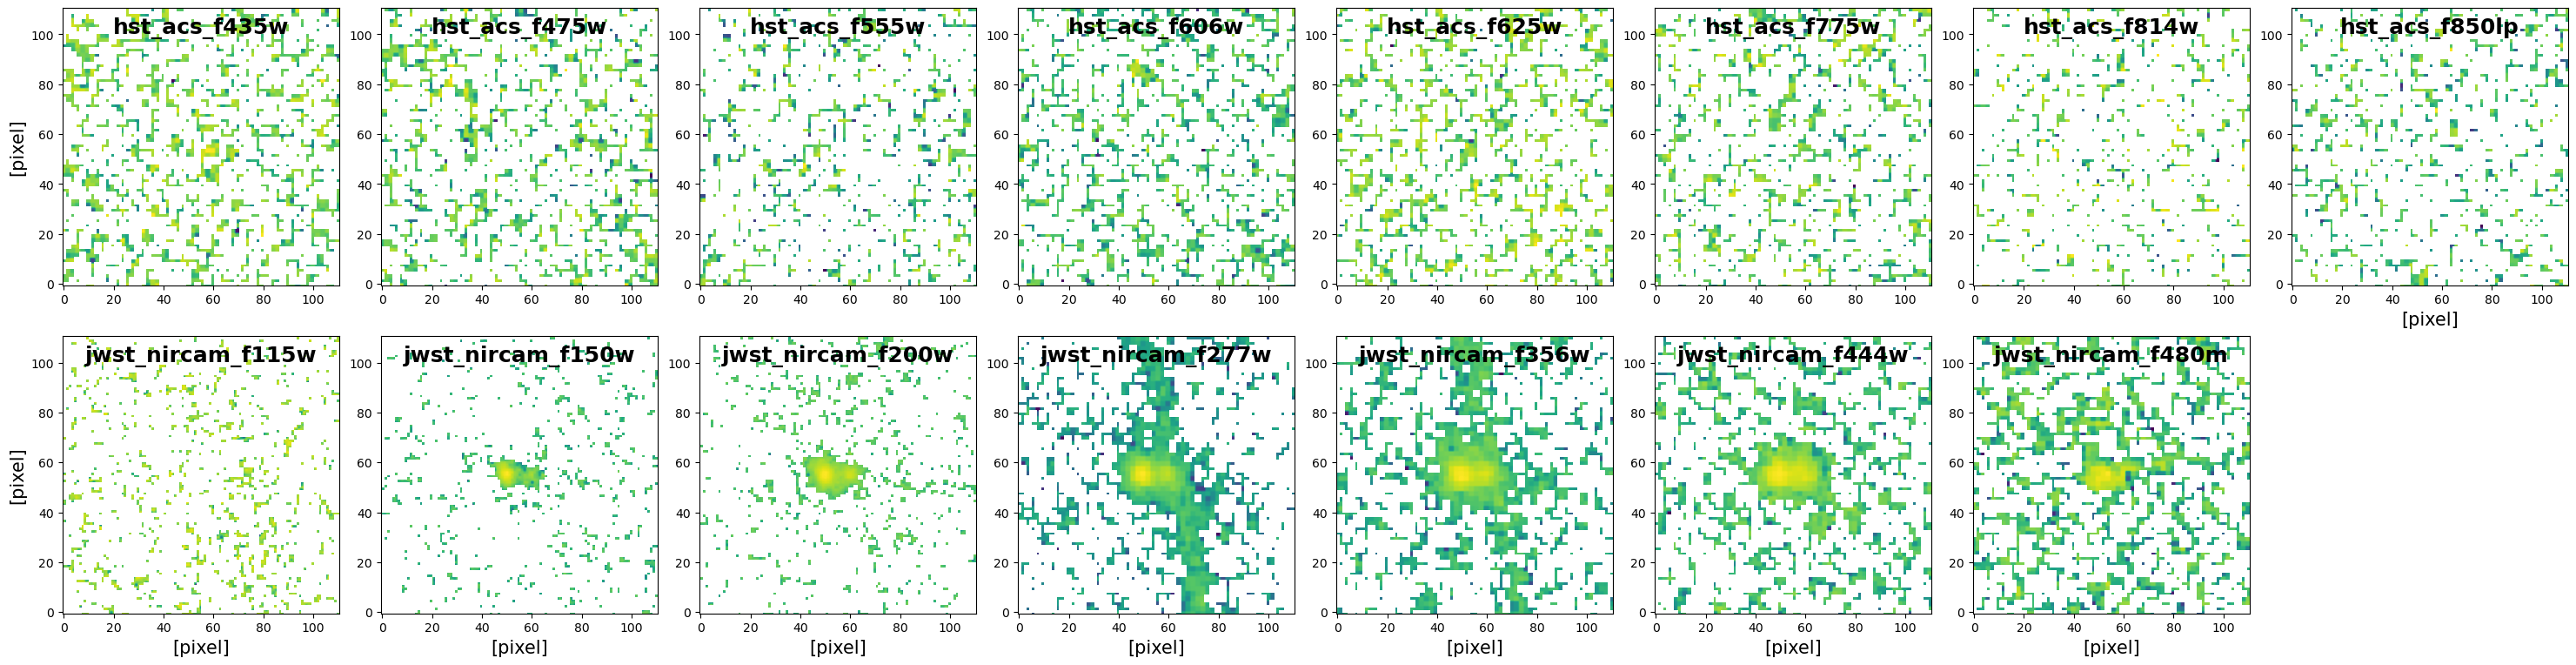

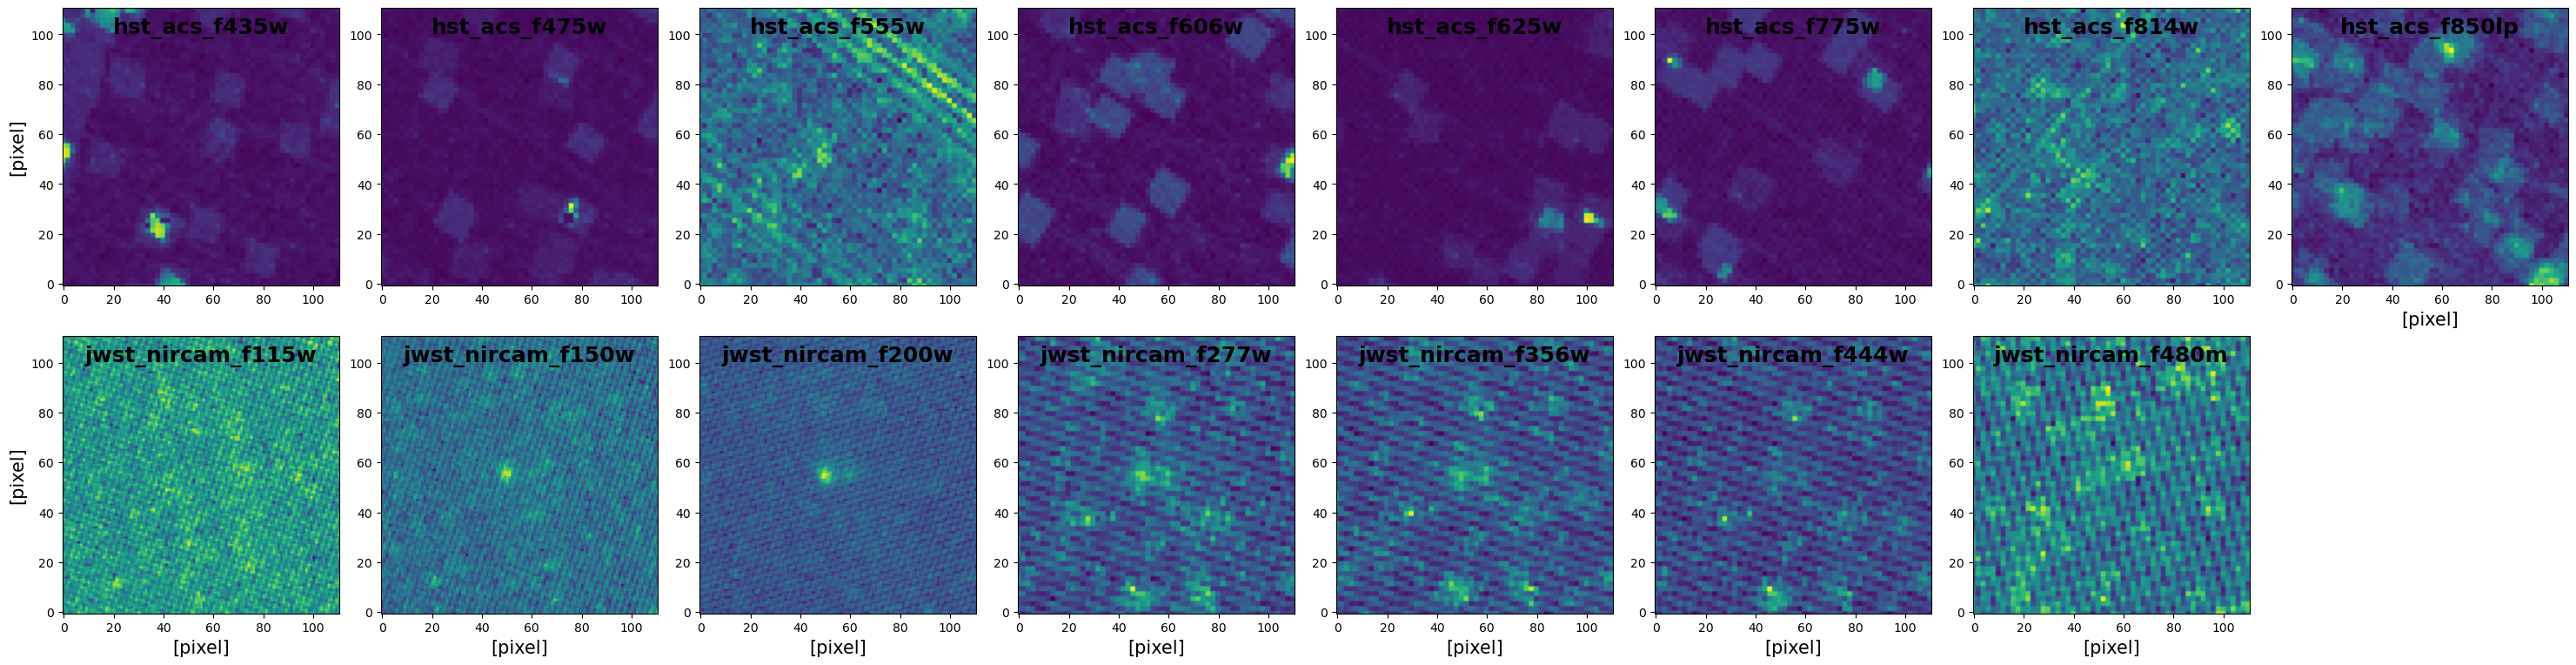

In [5]:
%matplotlib inline
img_process.plot_image_stamps(output_stamps=output_stamps, ncols=8)

## Get segmentation maps

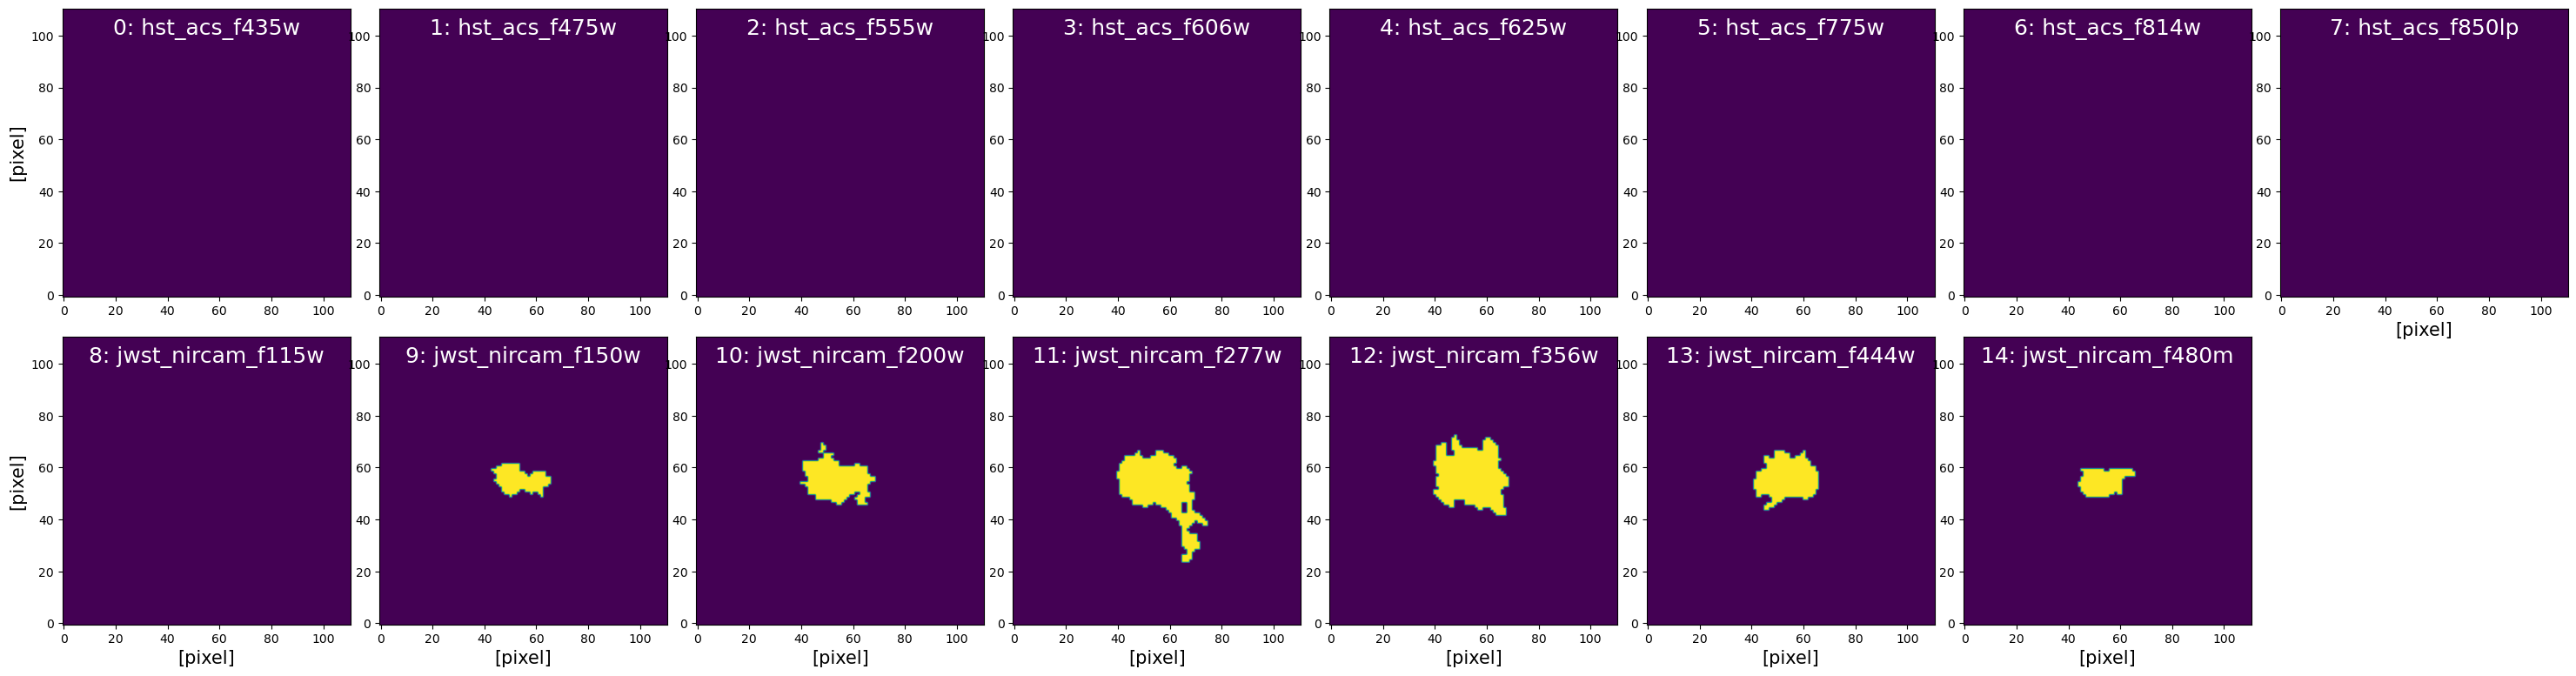

In [6]:
img_process.segmentation_sep(output_stamps=output_stamps, thresh=0.6, minarea=0, deblend_nthresh=10, deblend_cont=0.1)
img_process.plot_segm_maps(ncols=8)

## Define the galaxy's region of interest using a combination of multiple segmentation maps

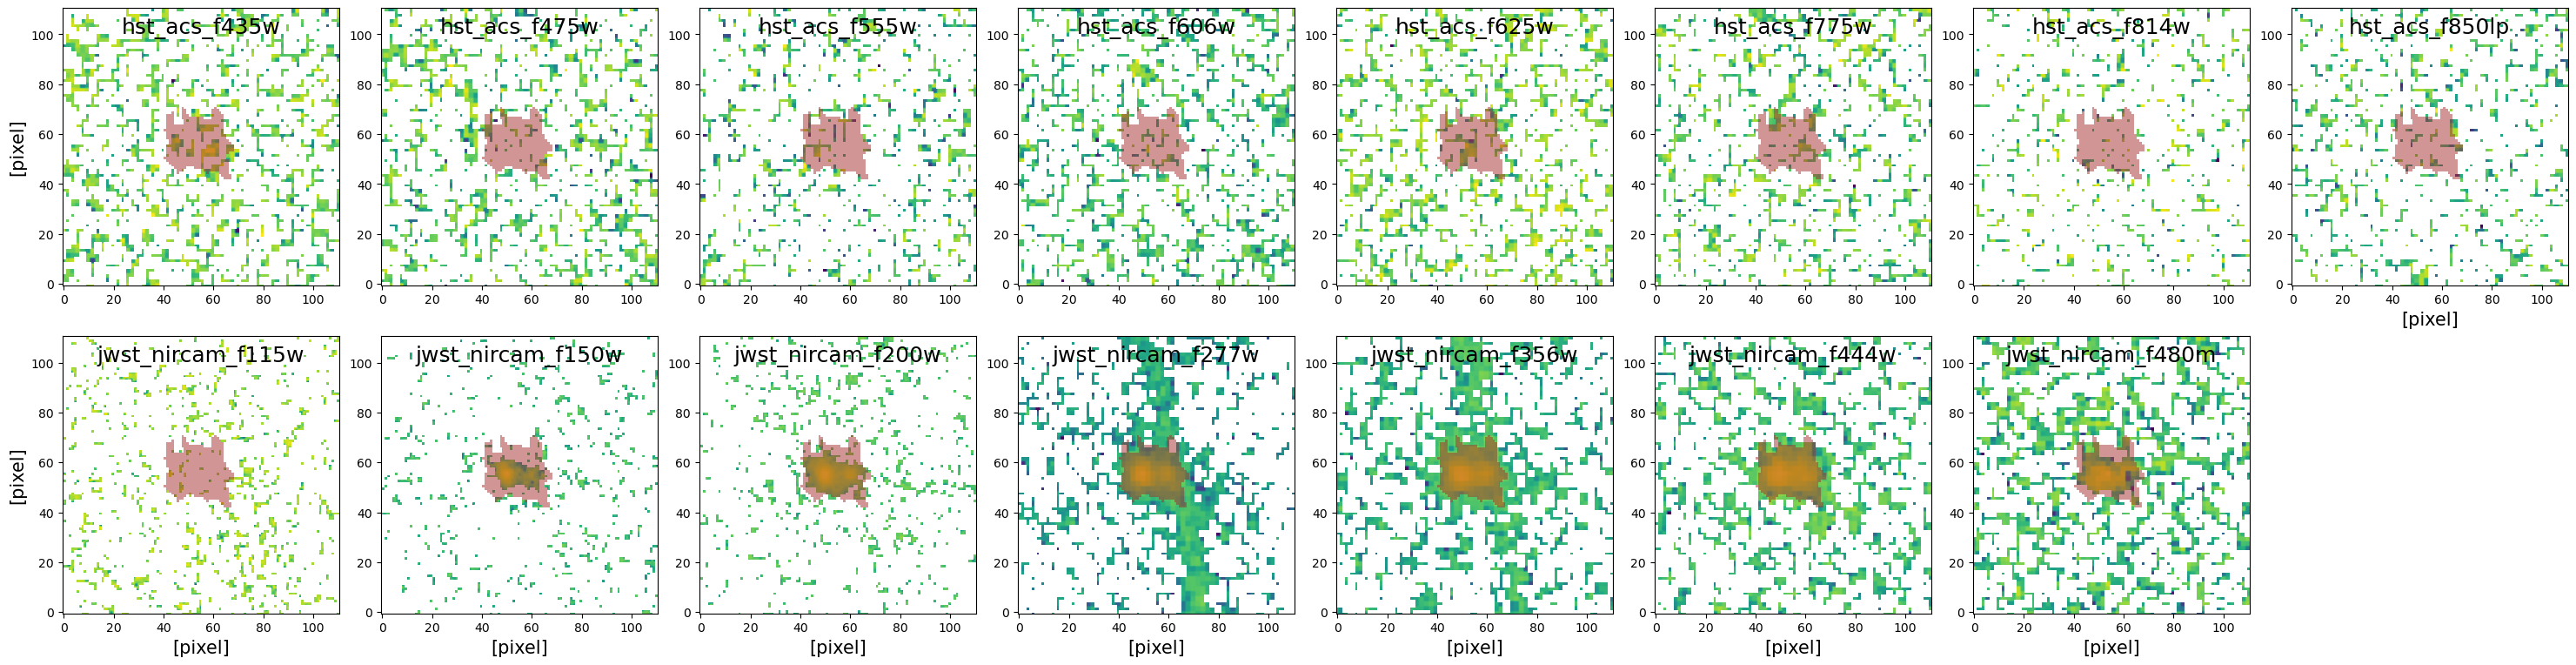

In [7]:
# Define galaxy's region
segm_maps_ids = [9,10,12,13,14]
gal_region = img_process.galaxy_region(segm_maps_ids)

img_process.plot_gal_region(gal_region, output_stamps=output_stamps, ncols=8)

## Get estimate of the dust extinction due to the foreground Galactic dust

In [8]:
from piXedfit.piXedfit_images import EBV_foreground_dust

Gal_EBV = EBV_foreground_dust(gal_ra, gal_dec)
print ('Gal_EBV = %lf' % Gal_EBV)

Gal_EBV = 0.092997


## Calculate maps of fluxes and flux uncertainties: photometric data cube

In [9]:
flux_maps_fits = "fluxmap_JD2.fits"
img_process.flux_map(gal_region, output_stamps=output_stamps, Gal_EBV=Gal_EBV, name_out_fits=flux_maps_fits)

'fluxmap_JD2.fits'

## Plot maps of multiband fluxes and flux uncertainties

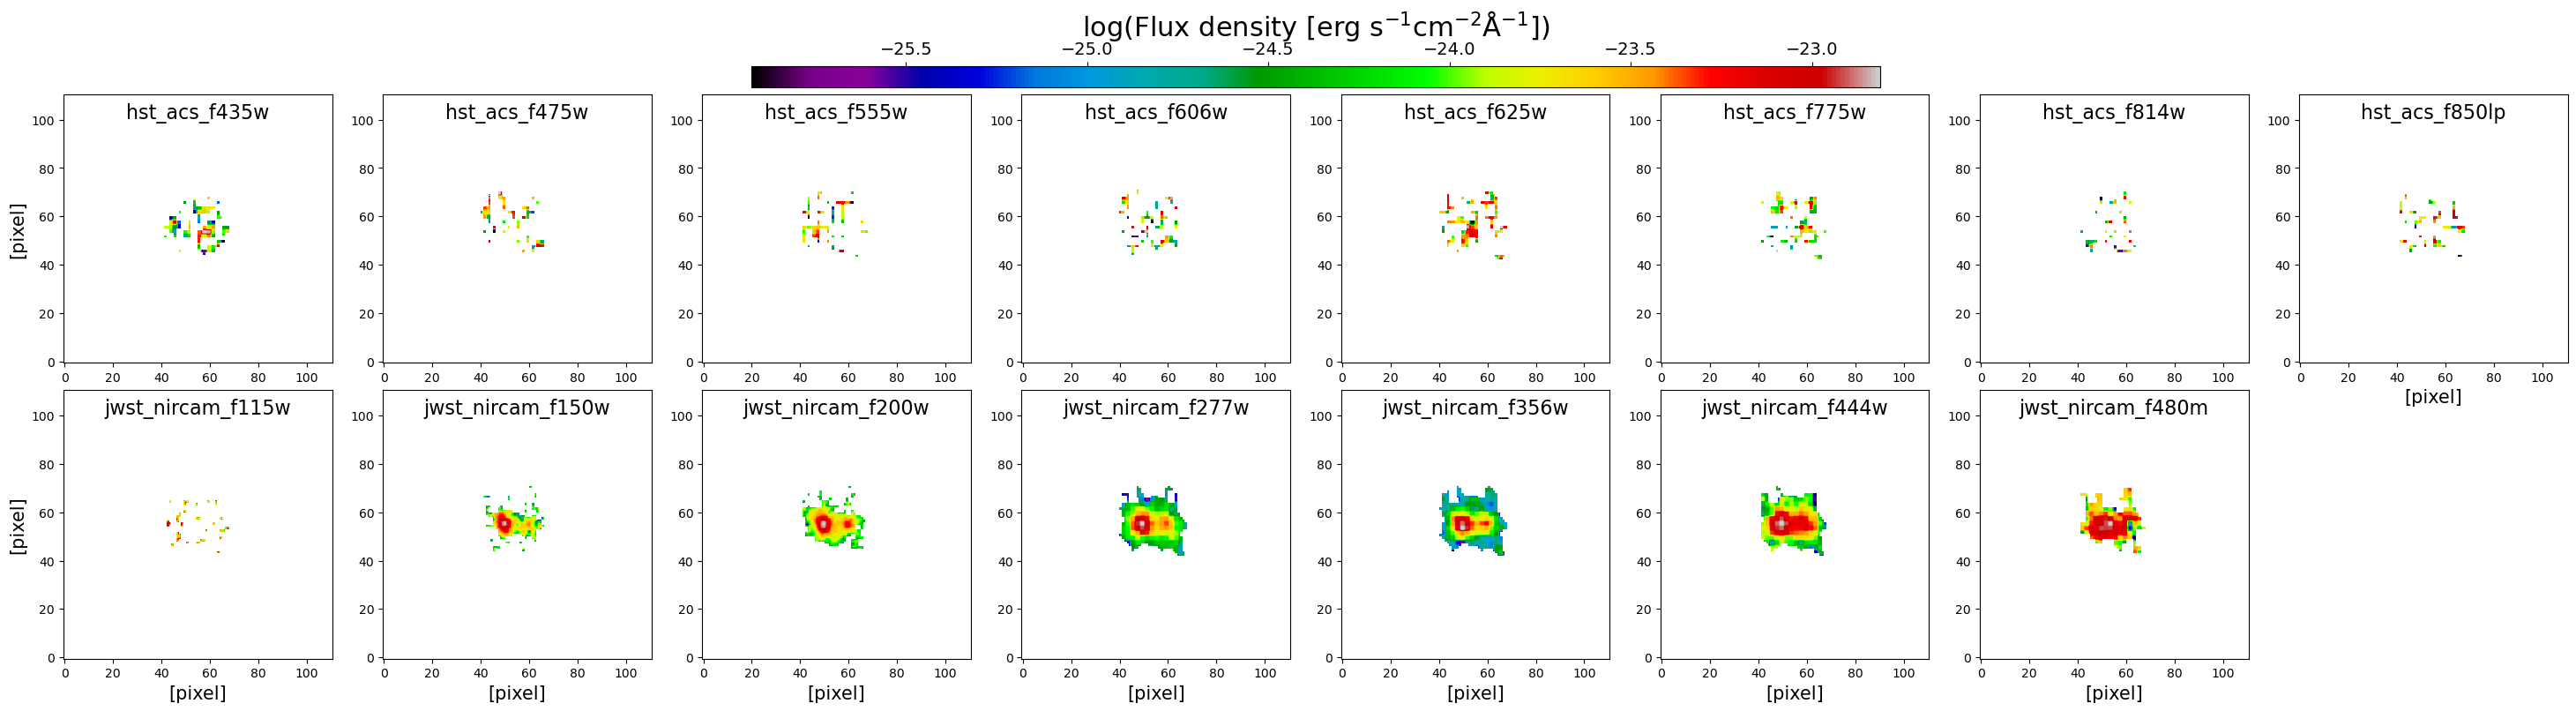

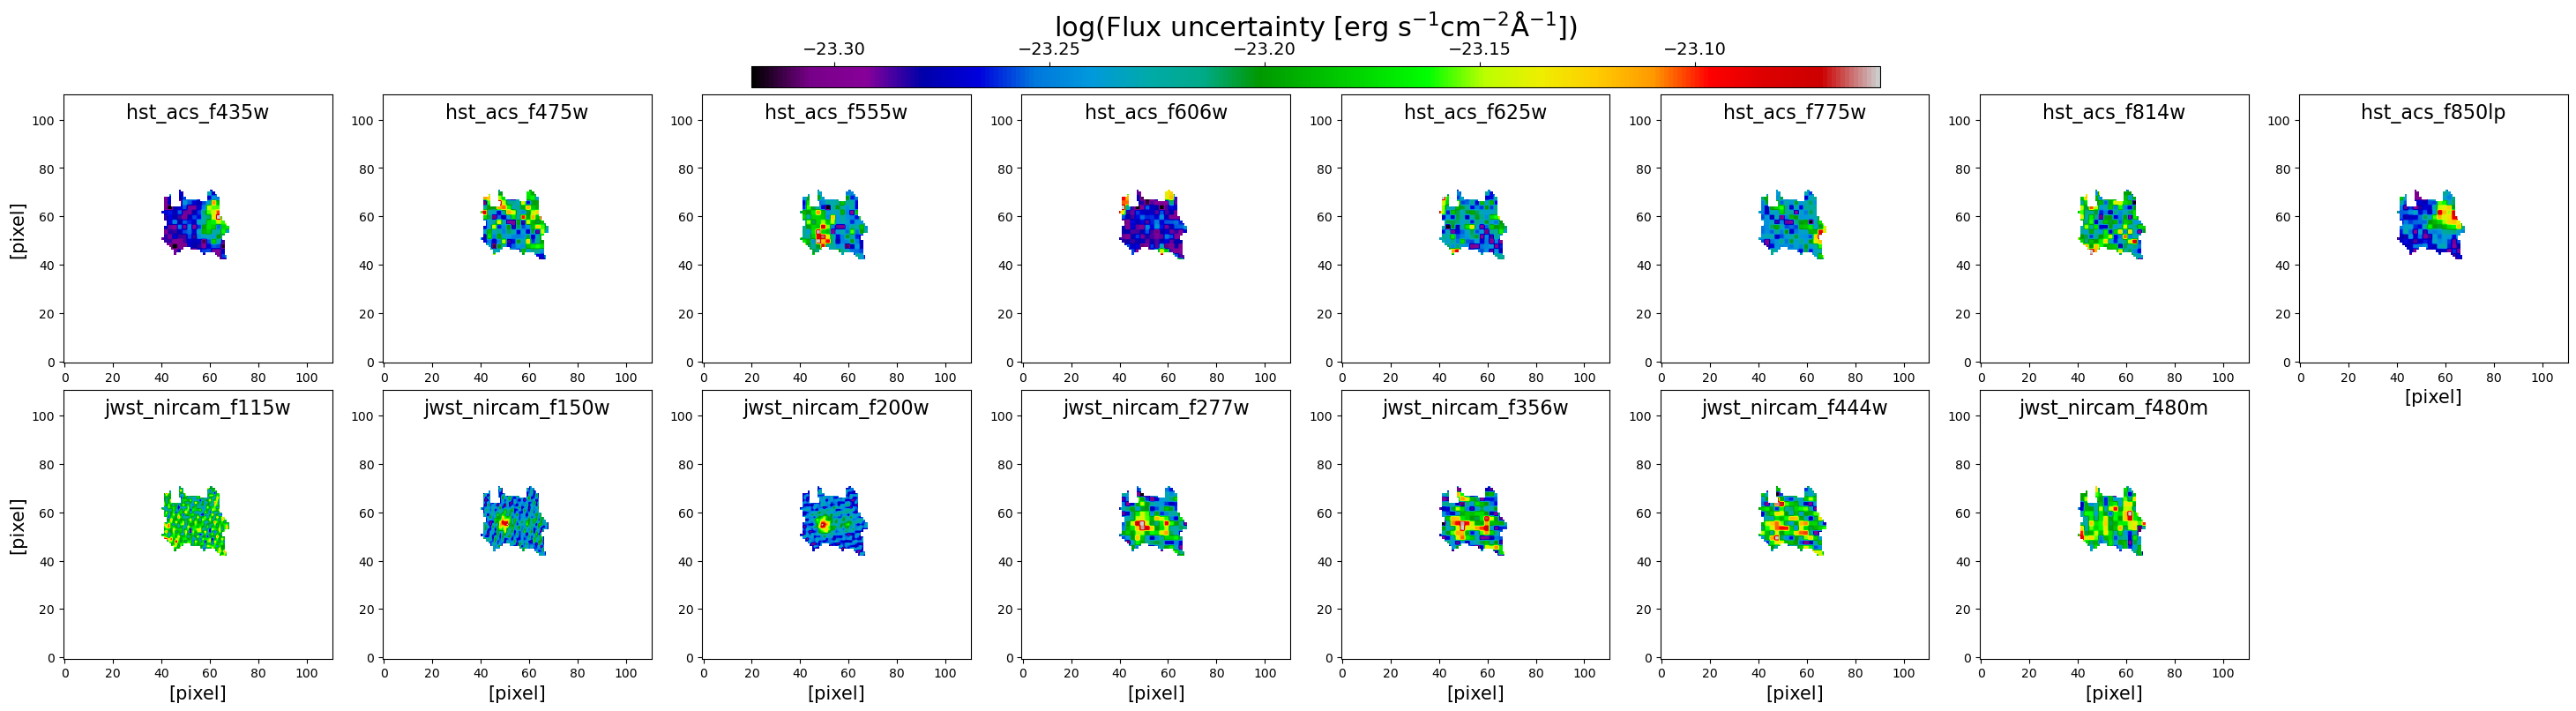

In [10]:
from piXedfit.piXedfit_images import plot_maps_fluxes

plot_maps_fluxes(flux_maps_fits, ncols=8)

## Plot the SEDs of all pixels

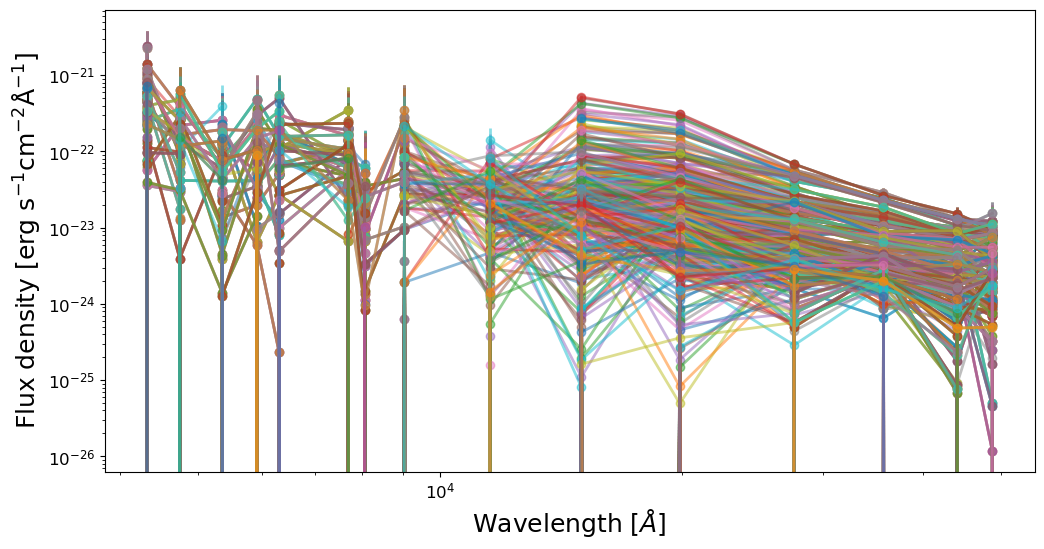

In [11]:
from piXedfit.piXedfit_images import plot_SED_pixels

plot_SED_pixels(flux_maps_fits, all_pixels=True, logscale_y=True, logscale_x=True, wunit='angstrom', yrange=None, xrange=None, name_plot=None)

## Measure photometry of the clumps A and B with elliptical apertures

In [12]:
# First, we open the FITS file and get the data
from piXedfit.piXedfit_images import open_fluxmap_fits

filters, gal_region, flux_map, flux_err_map, unit_flux = open_fluxmap_fits(flux_maps_fits)

### Define the elliptical apertures

Center of clump A: 50.000000, 55.000000
Center of clump B: 60.000000, 55.000000


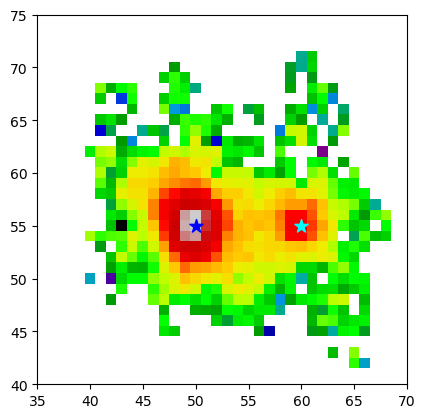

In [13]:
# Find the centers of clump A and B: the brightest pixels

from piXedfit.piXedfit_images import central_brightest_pixel

# clump A
filter_id = 10
A_cent_x, A_cent_y = central_brightest_pixel(flux_maps_fits, filter_id, xrange=[40,57], yrange=[47,60])
print ('Center of clump A: %lf, %lf' % (A_cent_x,A_cent_y))

# clump B
filter_id = 10
B_cent_x, B_cent_y = central_brightest_pixel(flux_maps_fits, filter_id, xrange=[57,65], yrange=[50,60])
print ('Center of clump B: %lf, %lf' % (B_cent_x,B_cent_y))

# show in a plot
plt.xlim(35,70)
plt.ylim(40,75)
plt.imshow(np.log10(flux_map[10]), origin='lower', cmap='nipy_spectral')

plt.scatter(A_cent_x, A_cent_y, s=100, color='blue', marker='*')
plt.scatter(B_cent_x, B_cent_y, s=100, color='cyan', marker='*')

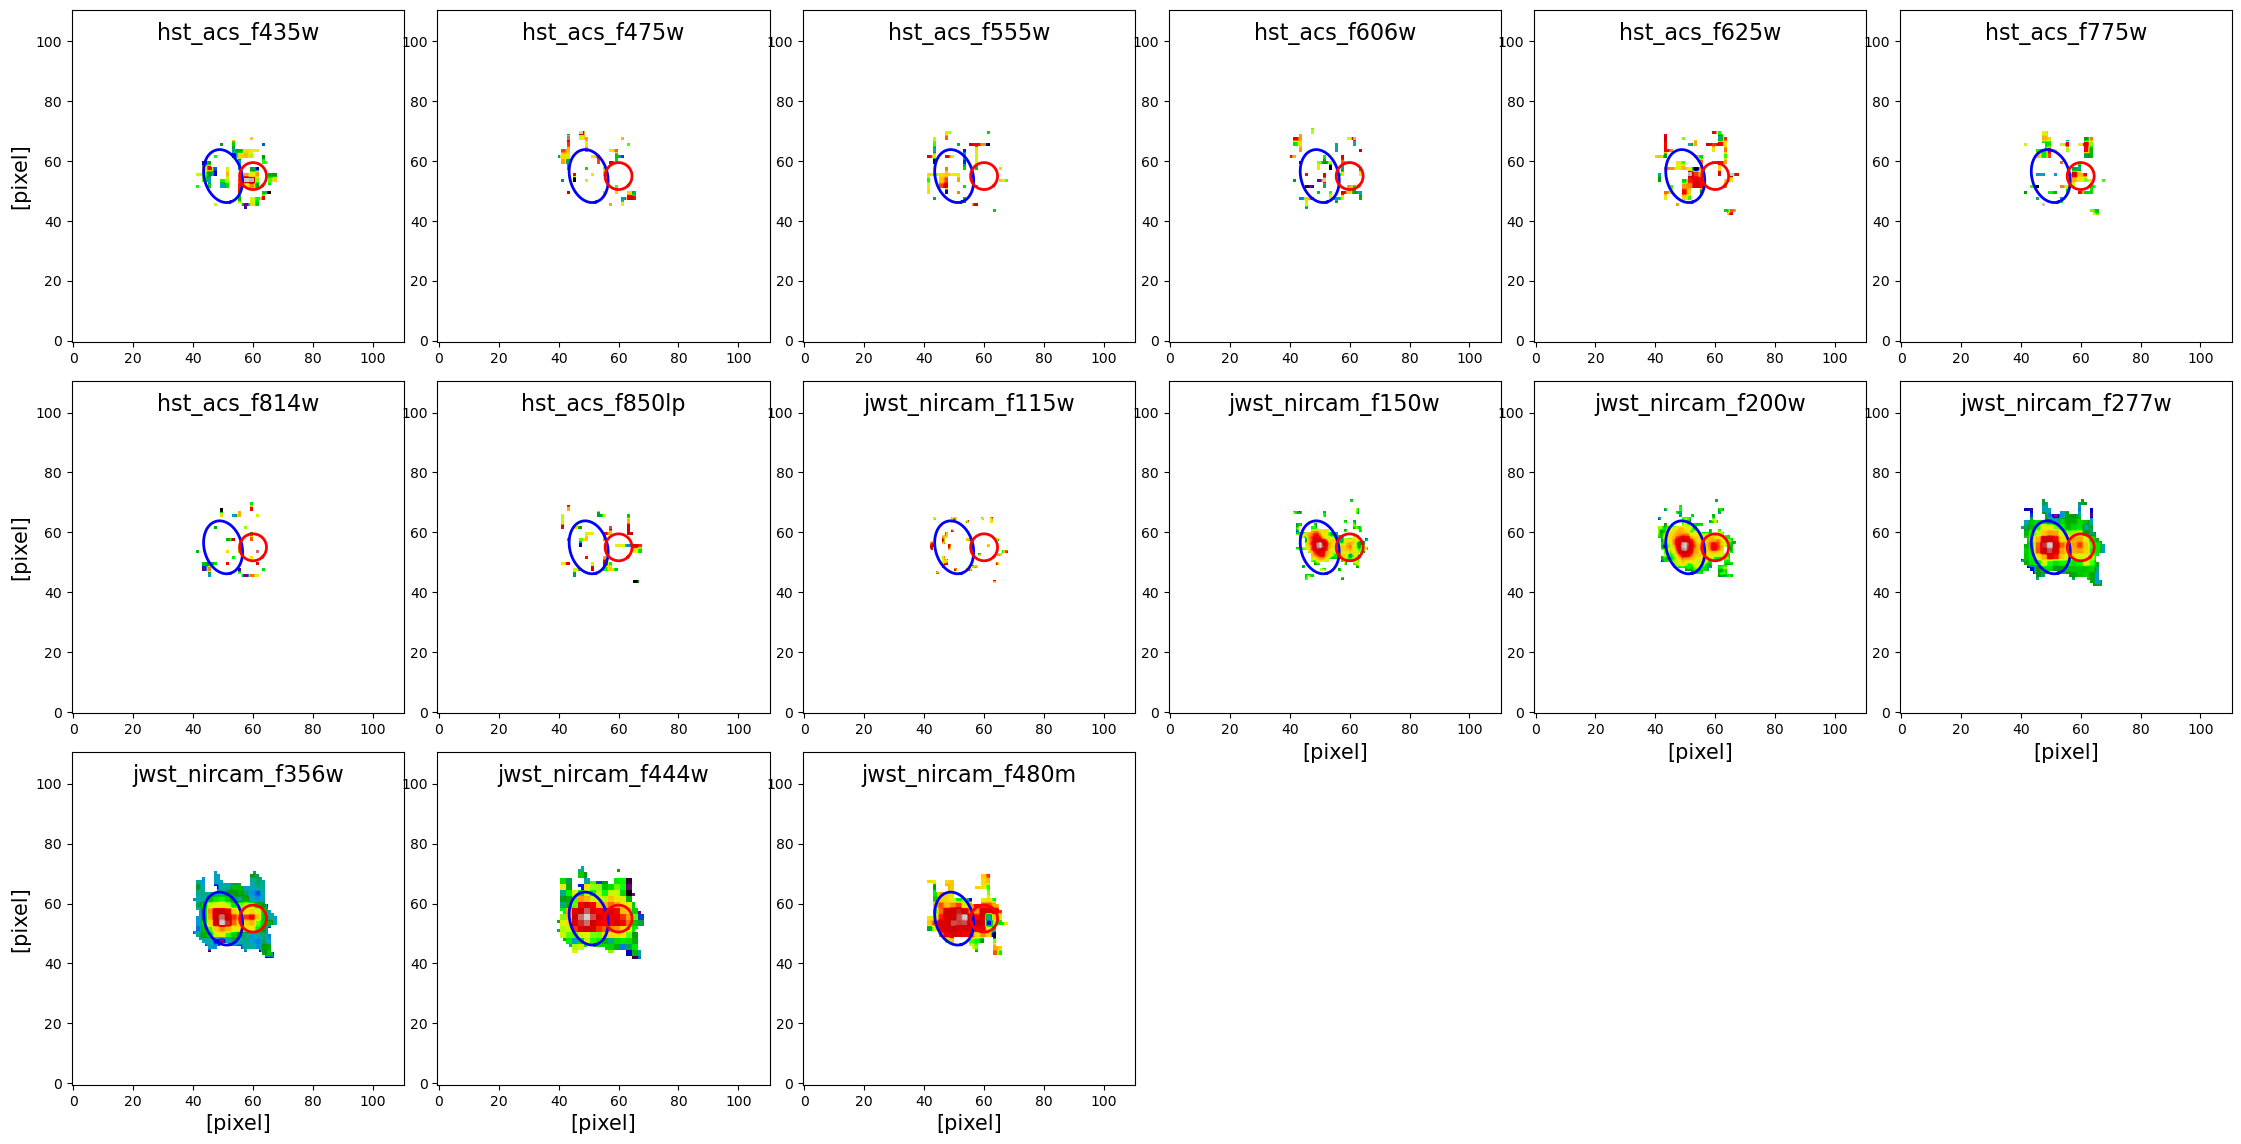

In [14]:
# Draw the epertures on the maps
from piXedfit.piXedfit_images import photometry_within_aperture, draw_aperture_on_maps_fluxes

e = [0.3, 0.0]
pa = [15.0, 45.0]
radius = [9.0, 4.5]
cent_x = [A_cent_x, B_cent_x]
cent_y = [A_cent_y, B_cent_y]
colors = ['blue', 'red']
draw_aperture_on_maps_fluxes(flux_maps_fits, e=e, pa=pa, cent_x=cent_x, cent_y=cent_y, radius=radius, 
                             lw=2, colors=colors, savefig=True, name_plot=None)

## Get the photometry of clumps A and B

In [15]:
from piXedfit.piXedfit_images import photometry_within_aperture

# photometry of clump A
A_tot_fluxes, A_tot_flux_errors = photometry_within_aperture(flux_maps_fits, e=e[0], pa=pa[0], cent_x=cent_x[0], cent_y=cent_y[0], radius=radius[0])

# photometry of clump B
B_tot_fluxes, B_tot_flux_errors = photometry_within_aperture(flux_maps_fits, e=e[1], pa=pa[1], cent_x=cent_x[1], cent_y=cent_y[1], radius=radius[1])

## Get wavelength of the filters

In [16]:
from piXedfit.utils.filtering import cwave_filters

photo_wave = cwave_filters(filters)

## Convert the flux unit to $\mu$Jy

In [17]:
from piXedfit.piXedfit_images import convert_flux_unit

A_tot_fluxes_uJy = convert_flux_unit(photo_wave, A_tot_fluxes, init_unit='erg/s/cm2/A', final_unit='uJy')
A_tot_flux_errors_uJy = convert_flux_unit(photo_wave, A_tot_flux_errors, init_unit='erg/s/cm2/A', final_unit='uJy')

B_tot_fluxes_uJy = convert_flux_unit(photo_wave, B_tot_fluxes, init_unit='erg/s/cm2/A', final_unit='uJy')
B_tot_flux_errors_uJy = convert_flux_unit(photo_wave, B_tot_flux_errors, init_unit='erg/s/cm2/A', final_unit='uJy')

## Plot the SEDs of clumps A and B

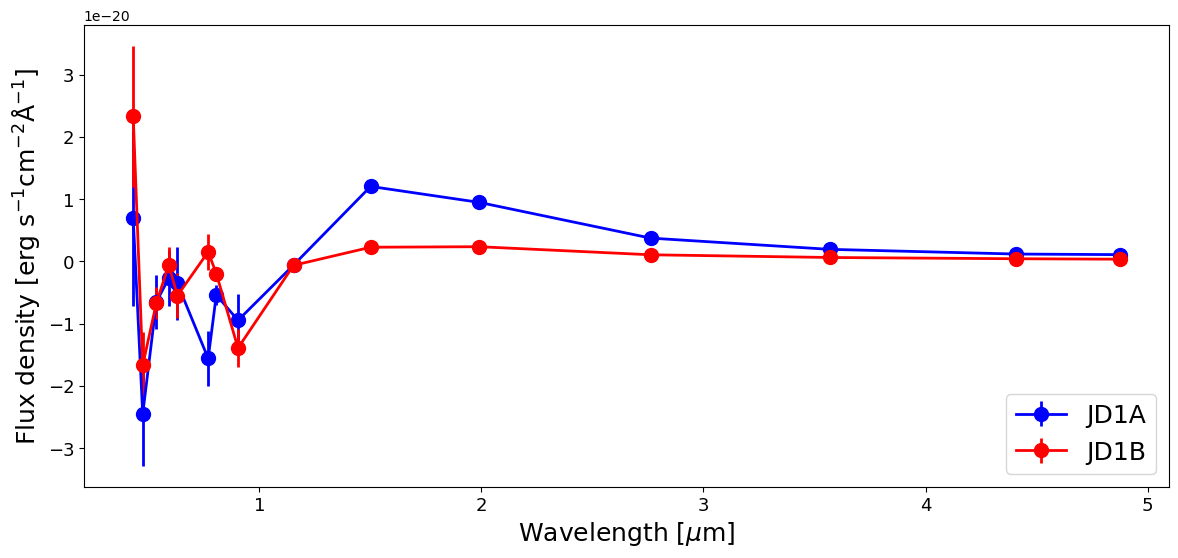

In [18]:
fig1 = plt.figure(figsize=(14,6))
f1 = plt.subplot()
plt.setp(f1.get_yticklabels(), fontsize=13, visible=True)
plt.setp(f1.get_xticklabels(), fontsize=13, visible=True)
plt.xlabel(r"Wavelength [$\mu$m]", fontsize=18)
plt.ylabel(r"Flux density [erg $\rm{s}^{-1}\rm{cm}^{-2}\AA^{-1}$]", fontsize=18)

plt.errorbar(photo_wave/1e+4, A_tot_fluxes, yerr=A_tot_flux_errors, fmt='-o', markersize=10,
             lw=2, alpha=1, color='blue', label='JD1A')
plt.errorbar(photo_wave/1e+4, B_tot_fluxes, yerr=B_tot_flux_errors, fmt='-o', markersize=10, 
             lw=2, alpha=1, color='red', label='JD1B')

plt.legend(fontsize=18, loc=4)

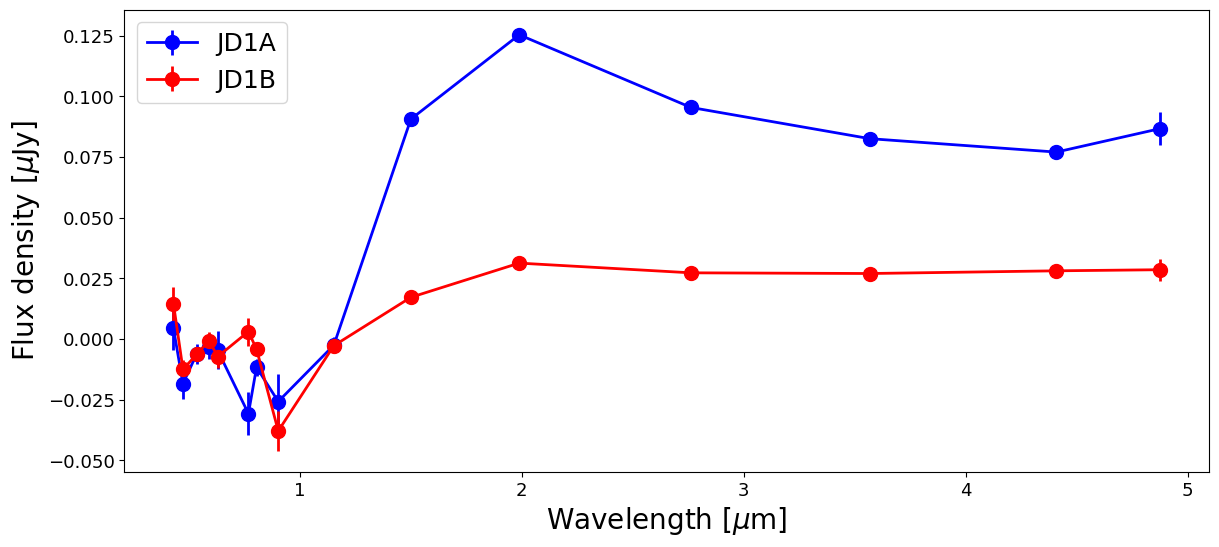

In [19]:
fig1 = plt.figure(figsize=(14,6))
f1 = plt.subplot()
plt.setp(f1.get_yticklabels(), fontsize=13, visible=True)
plt.setp(f1.get_xticklabels(), fontsize=13, visible=True)
plt.xlabel(r"Wavelength [$\mu$m]", fontsize=20)
plt.ylabel(r"Flux density [$\mu$Jy]", fontsize=20)

plt.errorbar(photo_wave/1e+4, A_tot_fluxes_uJy, yerr=A_tot_flux_errors_uJy, fmt='-o', 
             markersize=10, lw=2, alpha=1, color='blue', label='JD1A')
plt.errorbar(photo_wave/1e+4, B_tot_fluxes_uJy, yerr=B_tot_flux_errors_uJy, fmt='-o', 
             markersize=10, lw=2, alpha=1, color='red', label='JD1B')

plt.legend(fontsize=18, loc=2)